# Logits

This tutorial shows you how to use logits. Logits are un-normalized log-probabilities of amino acids at each position according to the masked-language model.



## What you need before getting started

You need a protein sequence of interest.

## Requesting logits

Select your model:

In [ ]:
model = session.embedding.get_model("prot-seq")

Defne your sequence and request logits, returning the final output layer of the language model. This example uses semaglutide:

In [ ]:
sequence = "HXEGTFTSDVSSYLEGQAAKEFIAWLVRGRG"

logits_future = model.logits([sequence])
print(logits_future.job)

status=<JobStatus.PENDING: 'PENDING'> job_id='b9098e33-536c-4bcb-8159-4e63a5cf976d' job_type='/embeddings/logits' created_date=datetime.datetime(2024, 6, 13, 3, 16, 6, 215705, tzinfo=datetime.timezone.utc) start_date=None end_date=None prerequisite_job_id=None progress_message=None progress_counter=0 num_records=1 sequence_length=None


Wait until the results are ready, polling periodically and reporting job progress (if multiple sequences are sent in the inference request):

In [ ]:
logits_future.wait_until_done(verbose=True)

Waiting: 100%|██████████| 100/100 [02:46<00:00,  1.67s/it, status=SUCCESS]


True

The results are displayed as a list of (sequence, np.ndarray) tuples.
The list is not guaranteed to be in the same order as the input. We recommend checking the sequence in the returned results.

Get the results:

In [ ]:
logits_results = logits_future.get() # or logits_future.wait()
returned_sequence, logits = logits_results[0]
print(returned_sequence)

HXEGTFTSDVSSYLEGQAAKEFIAWLVRGRG


Logits are of shape LxV, where V is the vocabulary size for the model.
Logits are not softmaxed. If you require normalized probabilities, pass the logits through a `softmax` or `log_softmax` function.

In [ ]:
print(logits.shape)

(31, 20)


In [ ]:
logits

array([[ 2.9614e-01,  3.3838e-01, -7.8125e-01, -1.9043e-01, -1.3350e+00,
        -5.0146e-01, -3.1586e-02,  3.4961e-01, -8.7695e-01, -4.4525e-02,
         6.7139e-01, -2.2937e-01,  2.5391e+00, -1.9055e-01, -8.6792e-02,
        -6.0394e-02, -6.9885e-02, -8.2275e-01, -5.4150e-01,  4.6606e-01],
       [ 4.7363e-01,  3.4473e-01, -5.8057e-01, -2.8305e-02, -1.2930e+00,
        -2.8247e-01,  2.3572e-01,  6.8848e-01, -4.5166e-01,  2.2571e-01,
         7.9297e-01, -8.1909e-02, -9.6240e-01,  9.7107e-02,  6.4160e-01,
         2.9150e-01,  9.7427e-03, -1.0557e+00, -3.7207e-01,  4.1333e-01],
       [ 1.0547e+00,  9.2188e-01, -1.1168e-03,  6.3330e-01, -6.5869e-01,
         8.5938e-02,  2.1741e-01,  1.0322e+00,  1.2909e-02,  4.0479e-01,
         1.0459e+00,  2.4768e-01, -5.3711e-01,  3.0029e-01,  7.3535e-01,
         8.5693e-01,  4.8120e-01, -4.3701e-01, -2.0584e-02,  6.3623e-01],
       [ 2.7173e-01,  2.6489e-01, -5.3271e-01, -4.6509e-02, -1.2549e+00,
        -3.2251e-01,  2.2693e-01,  4.6216e-01, -

## Plotting logits

You can plot the logits by position:

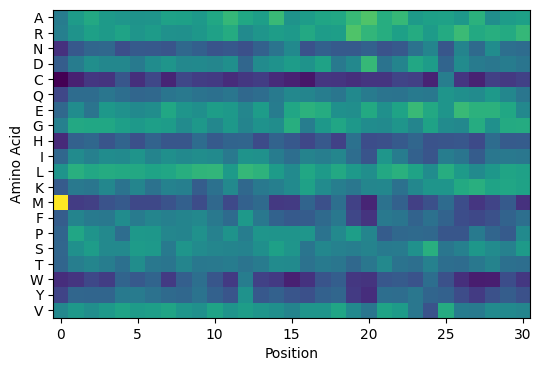

In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
alphabet = model.metadata.output_tokens

_, ax = plt.subplots(figsize=(20, 4))
ax.imshow(scipy.special.log_softmax(logits, axis=-1).T)
_ = ax.set_xlabel('Position')
_ = ax.set_ylabel('Amino Acid')
_ = ax.set_yticks(np.arange(len(alphabet)), alphabet)

## Next steps

For more information, visit the [Embeddings API](https://docs.openprotein.ai/api-python/embedding.html) reference.